
# Pokemon Data Analysis

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import requests
from  bs4 import BeautifulSoup

Lets dig in

In [45]:
link = 'https://www.serebii.net/pokedex-sm/730.shtml'
filename = 'pokemon_' + link.split('/')[-1].split('.')[0]
request = requests.get(link).text
soup = BeautifulSoup(request, 'html.parser')
pre_fix = 'https://serebii.net'
img = soup.findAll("img")[9].get("src")
img_downloaded = urllib.request.urlopen(pre_fix + img).read()
imagefile = open(filename + ".jpeg", 'wb')
imagefile.write(img_downloaded)
imagefile.close()

In [46]:
import cv2

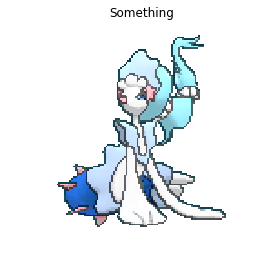

In [62]:
pk = cv2.imread('pokemon_730.jpeg')
pk = cv2.cvtColor(pk, cv2.COLOR_BGR2RGB)
nimg = pk
pk[np.where((pk == [0,0,0]).all(axis = 2))] = [255,255,255]
plt.imshow(pk)
plt.title('Something')
plt.axis('off')
plt.show()

In [64]:
df = pd.read_csv('Pokemon.csv')
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.head()

,#,name,type_1,type_2,total,hp,attack,defense,sp._atk,sp._def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [65]:
df.tail()

,#,name,type_1,type_2,total,hp,attack,defense,sp._atk,sp._def,speed,generation,legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [69]:
pokemon_numbers = df['#'].tolist()
pokemon_numbers[:10]

[1, 2, 3, 3, 4, 5, 6, 6, 6, 7]

In [ ]:
for numbers in range(1, 10):
    link = 'https://www.serebii.net/pokedex-sm/' + str(numbers) + '.shtml'
    filename = 'pokemon_' + link.split('/')[-1].split('.')[0]
    request = requests.get(link).text
    soup = BeautifulSoup(request, 'html.parser')
    pre_fix = 'https://serebii.net'
    img = soup.findAll("img")[9].get("src")
    img_downloaded = urllib.request.urlopen(pre_fix + img).read()
    imagefile = open(filename + ".jpeg", 'wb')
    imagefile.write(img_downloaded)
    imagefile.close()

The dataset contains all generations, starting from Gen 1 (Red and Blue) to Gen 7 (Sun and Moon)

In [27]:
df['generation'].unique()

array([1, 2, 3, 4, 5, 6])

The best pokemon for each stat

In [29]:
stats = df.columns[4:11]
for col in stats:
    pkmon = df['name'][df[col].argmax()]
    print('{} has the highest {} stat'.format(pkmon, col))

MewtwoMega Mewtwo X has the highest total stat
Blissey has the highest hp stat
MewtwoMega Mewtwo X has the highest attack stat
SteelixMega Steelix has the highest defense stat
MewtwoMega Mewtwo Y has the highest sp._atk stat
Shuckle has the highest sp._def stat
DeoxysSpeed Forme has the highest speed stat


How many legendries are there?

In [33]:
print('There are {} legendary pokemon'.format(sum(df['legendary'])))

There are 65 legendary pokemon


In [42]:
df['name'][df['legendary']]

156                    Articuno
157                      Zapdos
158                     Moltres
162                      Mewtwo
163         MewtwoMega Mewtwo X
164         MewtwoMega Mewtwo Y
262                      Raikou
263                       Entei
264                     Suicune
269                       Lugia
270                       Ho-oh
414                    Regirock
415                      Regice
416                   Registeel
417                      Latias
418           LatiasMega Latias
419                      Latios
420           LatiosMega Latios
421                      Kyogre
422         KyogrePrimal Kyogre
423                     Groudon
424       GroudonPrimal Groudon
425                    Rayquaza
426       RayquazaMega Rayquaza
427                     Jirachi
428          DeoxysNormal Forme
429          DeoxysAttack Forme
430         DeoxysDefense Forme
431           DeoxysSpeed Forme
537                        Uxie
                 ...           
543     

Now for some plots

pokemon distribution by types

In [ ]:
plt.plot()